In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[2.857142857142861, 11.42857142857143, 25.714285714285708, 0.0, 8.57142857142857, 1.4285714285714164, 51.42857142857143, 2.857142857142861, 0.0, 0.0, 0.0, 2.857142857142861, 14.285714285714292, 0.0, 4.285714285714278, 31.42857142857143, 8.57142857142857, 0.0, 0.0, 44.28571428571428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4285714285714448, 12.857142857142875, 38.57142857142858, 7.142857142857139, 1.4285714285714448, 1.4285714285714164, 21.42857142857143, 0.0, 0.0, 0.0, 0.0, 2.857142857142861, 7.142857142857139, 3.030303030303031, 4.285714285714278, 0.0, 14.285714285714292, 34.285714285714285, 0.0, 9.999999999999998, 10.0, -2.857142857142861, 0.0, -4.285714285714278, 0.0, 22.85714285714287, 22.857142857142875, 0.0, 35.71428571428572, 0.0, 41.42857142857143, 0.0, 7.142857142857153, 0.0, 4.285714285714278, 28.57142857142857, 1.4285714285714448, -2.857142857142861, 0.0, 12.857142857142875, 1.4285714285714164, 0.0, -4.285714285714306, 45.714285714285715, 18.57142857142857, 0.0, 7.1428571428571

In [3]:
temp = np.array(deltas)
print(f"Number of prompts that worsened: {len(temp[temp < 0])}")
print(f"Number of prompts that improved: {len(temp[temp > 0])}")
print(f"Number of prompts that stayed the same: {len(temp[temp == 0])}")


Number of prompts that worsened: 6
Number of prompts that improved: 55
Number of prompts that stayed the same: 38


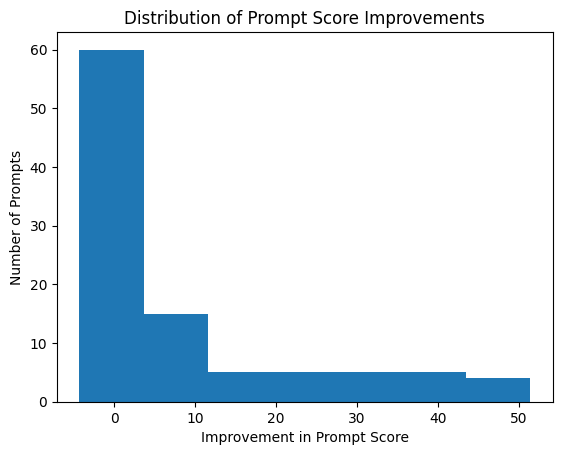

In [4]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

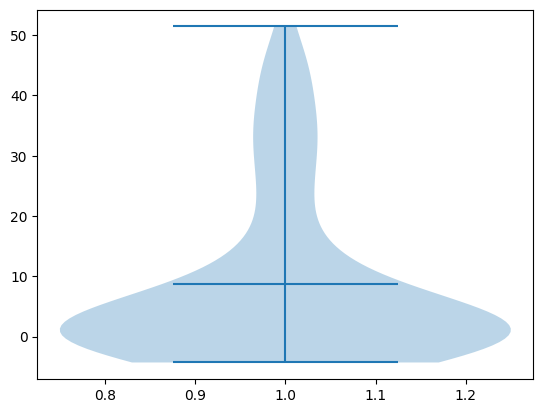

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()

In [2]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np


initial_prompts = []
optimized_prompts = []


with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt = list(data[k]["initial_prompt"].keys())[0]
        optimized_prompt = list(data[k]["optimized_prompt"].keys())[0]
        initial_prompts.append(initial_prompt)
        optimized_prompts.append(optimized_prompt)

assert len(initial_prompts) == len(optimized_prompts)

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
initial_embeddings = model.encode(initial_prompts, show_progress_bar = True)
optimized_embeddings = model.encode(optimized_prompts, show_progress_bar = True)

/home/dpaul/.local/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

[-0.5145456  -0.50140107 -0.53897965 -0.48527405 -0.5021518  -0.5139088
 -0.4709653  -0.51438314 -0.5303284  -0.5491002  -0.5560202  -0.48454612
 -0.51739407 -0.547745   -0.55921704 -0.50319445 -0.5183158  -0.54318005
 -0.4994535  -0.539665   -0.5123832  -0.5421626  -0.5350033  -0.53285676
 -0.5594776  -0.5329114  -0.56199896 -0.50029796 -0.5465595  -0.52488333
 -0.5140123  -0.49461156 -0.555836   -0.5731801  -0.5481454  -0.5370297
 -0.5245437  -0.547741   -0.5157552  -0.4849447  -0.5467567  -0.5821904
 -0.5284602  -0.506722   -0.5547596  -0.49835983 -0.5145972  -0.5449131
 -0.53384614 -0.503383   -0.49192291 -0.5172861  -0.56088567 -0.50236267
 -0.54782057 -0.5085741  -0.55756605 -0.55313027 -0.54337776 -0.5254612
 -0.5331362  -0.52307177 -0.49053258 -0.53198886 -0.48719263 -0.55051947
 -0.51556176 -0.55344355 -0.5647139  -0.5623873  -0.53944004 -0.49069107
 -0.54328823 -0.51198727 -0.56718445 -0.5007619  -0.55210674 -0.55063033
 -0.5672821  -0.51447624 -0.5025893  -0.46909213 -0.5224

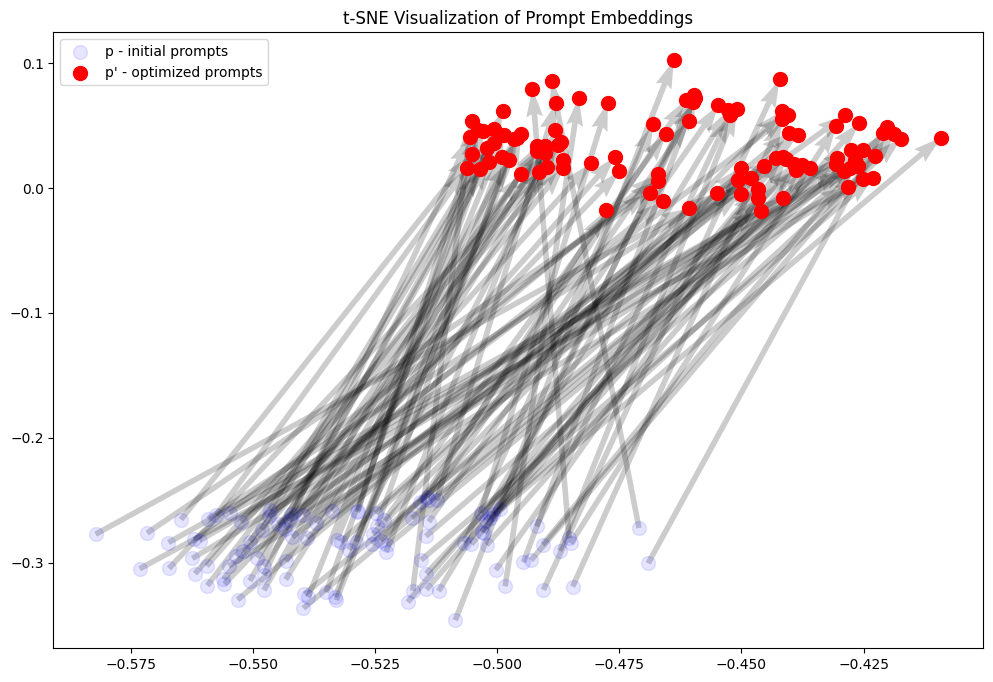

In [6]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np

# # Initialize lists
# initial_prompts = [
#     "'What is the capital of {place}?'",
#     'Please properly punctuate the given text (without omitting a single word) and output only the resulting punctuated text. Please do not omit a single word from the original text. {TEXT}',
#     'Please help me to translate the following text to {LANGUAGE}. Please return only translated content not include the origin text. Here is the text: \n\n{TEXT}',
#     'Please summarize the following text: {TEXT}'
# ] 
# optimized_prompts = [
#     "Q: 'What is the capital of {place}?'\nA: Craft a poignant and evocative narrative, weaving together a tapestry of words that captivates and transcends the ordinary.",
#     "Please check the following sentence and correct any missing punctuation and grammatical errors. Output the punctuated text without omitting any words: \"{TEXT}\". Only provide the corrected text.",
#     """Translate the text into the target {LANGUAGE}. Please only return the high-quality translated content, excluding the original text or additional information. Ensure that your translation maintains the same meaning and context as the original text, preserving its overall tone and style. Provide a fluent, natural-sounding translation that reads as if written by a native speaker. 

# **Original text:**

# {TEXT}""",
#     """Summarize the text below: {TEXT}. 
# Make sure your summary includes all the important points and is clear and informative, and well-organized."""
# ]


# Reduce dimensionality
tsne = TSNE(n_components=2, perplexity=len(initial_embeddings) - 1)

initial_embeddings_reduced = tsne.fit_transform(initial_embeddings)
optimized_embeddings_reduced = tsne.fit_transform(optimized_embeddings)

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial prompts
x_coords_initial = initial_embeddings_reduced[:, 0]
y_coords_initial = initial_embeddings_reduced[:, 1]
# plt.scatter(x_coords_initial, y_coords_initial, color='r', alpha=0.7, label='p', s=200)


# Plot optimized prompts
x_coords_optimized = optimized_embeddings_reduced[:, 0]
y_coords_optimized = optimized_embeddings_reduced[:, 1]
# plt.scatter(x_coords_optimized, y_coords_optimized, color='b', alpha=0.7, label='p\'', s=200)

# Draw arrows between initial and optimized prompts
print(x_coords_initial)
print(y_coords_optimized)
# Calculate the differences between initial and optimized coordinates
dx = x_coords_optimized - x_coords_initial
dy = y_coords_optimized - y_coords_initial

# Create a quiver plot
plt.quiver(
    x_coords_initial,
    y_coords_initial,
    dx,
    dy,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="black",
    alpha=0.2,
)

# Plot initial prompts
plt.scatter(
    x_coords_initial,
    y_coords_initial,
    color="b",
    alpha=0.1,
    label="p - initial prompts",
    s=100,
)

# Plot optimized prompts
plt.scatter(
    x_coords_optimized,
    y_coords_optimized,
    color="r",
    alpha=1,
    label="p' - optimized prompts",
    s=100,
)

plt.title("t-SNE Visualization of Prompt Embeddings")
# plt.xlabel('t-SNE axis 1')
# plt.ylabel('t-SNE axis 2')
plt.legend()
plt.show()

In [9]:
initial_prompts = np.array(initial_prompts)
optimized_prompts = np.array(optimized_prompts)

initial_prompts[initial_prompts == optimized_prompts]

array(["Assume that there is/are SQL table(s) named '{TEXT}' ",
       'paraphrase the following text in an ELI5 style:\n{TEXT}',
       'Help summarize the article.: {TEXT}',
       'Generate professional summary based on {TEXT}.\n\n',
       'Convert the following verbal description of a color palette into a list of colors: {TEXT}',
       'Maintain the clarity in the following text to re-write the following text as an article:{TEXT}',
       'A human is talking to a chatbot.\n\n{TEXT}\n\nQ: What is the subject of this conversation? If it is not clear, just say "unknown".\nA: The subject of this conversation is',
       'You are a dad-joke assistant. Reply with a funny dad-joke related to the transcription below:\n{TEXT}',
       'Write the lyrics of a song titled {TEXT}',
       'Provide one paragraph of text from the following bullet point list, delimited by triple backticks: ```{TEXT}```',
       'Write a catchphrase         for the following company: {TEXT}',
       'Please provi